In [1]:
import numpy as np
import pandas as pd
import os
import sys
from google.colab import drive
import matplotlib.pyplot as plt
import math
import itertools

import random
import seaborn as sns

In [2]:
#mount google colab
drive.mount('/content/drive',force_remount = True)

Mounted at /content/drive


Topic:
What does the musician(artists) social network look like?
- Firstly, how will we measure individual artists' influence? We use followers number in
the data set (influence_data)
- Then, we calculate and average the influence of each song of individual artists, and
incorporate the song influence with the followers number together as the general
influence of artists

In [3]:
df_inf = pd.read_csv('/content/drive/MyDrive/Richard_FRL/Project Data/2021_ICM_Problem_D_Data/influence_data.csv')
df_full= pd.read_csv('/content/drive/MyDrive/Richard_FRL/Project Data/2021_ICM_Problem_D_Data/full_music_data.csv')

In [4]:
df_full['artists_id'] = df_full['artists_id'].apply(lambda x: x.replace('[','').replace(']',''))
df_full['artist_names'] = df_full['artist_names'].apply(lambda x: x.replace('[','').replace(']',''))
df_full['artist_names'] = df_full['artist_names'].apply(lambda x: x.replace('"',''))
df_full['artist_names'] = df_full['artist_names'].apply(lambda x: x.replace("'",""))
#df_full['artists_id'] = df_full['artists_id'].apply(lambda x: x.replace(', ',''))

#remove brackets from the column 
df_full['artists_id'] = df_full['artists_id'].astype(str)

In [5]:
df_full['artists_id']

0        178301
1        178301
2        178301
3        625201
4        625201
          ...  
98335    690254
98336    690254
98337    690254
98338    690254
98339    690254
Name: artists_id, Length: 98340, dtype: object

In [6]:
df_full['length'] = df_full.artists_id.str.len()
df_full = df_full[df_full.length <= 7]

In [7]:
df_full['artists_id'].value_counts()

26350     874
79016     684
792507    677
119107    610
66915     539
         ... 
294511      1
582629      1
674417      1
243611      1
933809      1
Name: artists_id, Length: 5549, dtype: int64

In [8]:
df_full['artists_id'] = df_full['artists_id'].astype(int)

In [9]:
#remove brackets from the column 
df_full['artist_names'].value_counts()


Wolfgang Amadeus Mozart     874
Billie Holiday              684
Frank Sinatra               677
Vladimir Horowitz           610
Bob Dylan                   539
                           ... 
Tommy Collins                 1
Garth Brooks                  1
The King Khan & BBQ Show      1
The Horrors                   1
Babylon A.D.                  1
Name: artist_names, Length: 5549, dtype: int64

In [10]:
df_inf['followers_count'] = df_inf.groupby('influencer_id').influencer_id.transform('count')
df_inf

,influencer_id,influencer_name,influencer_main_genre,influencer_active_start,follower_id,follower_name,follower_main_genre,follower_active_start,followers_count
0,759491,The Exploited,Pop/Rock,1980,74,Special Duties,Pop/Rock,1980,12
1,25462,Tricky,Electronic,1990,335,PJ Harvey,Pop/Rock,1990,12
2,66915,Bob Dylan,Pop/Rock,1960,335,PJ Harvey,Pop/Rock,1990,389
3,71209,Leonard Cohen,Pop/Rock,1950,335,PJ Harvey,Pop/Rock,1990,64
4,91438,The Gun Club,Pop/Rock,1980,335,PJ Harvey,Pop/Rock,1990,9
...,...,...,...,...,...,...,...,...,...
42765,580300,Sufjan Stevens,Pop/Rock,1990,3661738,Rosemary & Garlic,Pop/Rock,2010,3
42766,261309,Vybz Kartel,Reggae,2000,3670556,Trinidad Cardona,R&B;,2010,1
42767,467203,Michael Jackson,R&B;,1960,3670556,Trinidad Cardona,R&B;,2010,101
42768,2518003,Popcaan,Reggae,2000,3670556,Trinidad Cardona,R&B;,2010,1


In [11]:
"""df_inf.to_csv('df_inf.csv')
!cp df_inf.csv '/content/drive/MyDrive/Richard_FRL/Project Data/2021_ICM_Problem_D_Data/'"""

"df_inf.to_csv('df_inf.csv')\n!cp df_inf.csv '/content/drive/MyDrive/Richard_FRL/Project Data/2021_ICM_Problem_D_Data/'"

In [12]:
df_full['song_inf'] = df_full.groupby(['artists_id','song_title (censored)'])['popularity'].transform('mean') 
df_full['song_inf_avg'] = df_full.groupby(['artists_id'])['song_inf'].transform('mean') 

In [13]:
df_full

,artist_names,artists_id,danceability,energy,valence,tempo,loudness,mode,key,acousticness,instrumentalness,liveness,speechiness,explicit,duration_ms,popularity,year,release_date,song_title (censored),length,song_inf,song_inf_avg
0,Fat Freddys Drop,178301,0.600,0.365,0.131,130.046,-13.083,0,9,0.06720,0.585000,0.0921,0.0498,0,437200,54,2005,2005,Ernie,6,54.0,54.000000
1,Fat Freddys Drop,178301,0.874,0.326,0.179,119.620,-13.302,0,11,0.01360,0.148000,0.0993,0.1310,0,581008,53,2005,2005,Wandering Eye,6,53.0,54.000000
2,Fat Freddys Drop,178301,0.670,0.531,0.336,139.385,-8.267,0,9,0.01560,0.345000,0.3060,0.0377,0,431293,55,2009,8/7/2009,The Raft,6,55.0,54.000000
3,Alexander ONeal,625201,0.761,0.702,0.850,104.773,-8.523,1,7,0.10800,0.000031,0.0935,0.0389,0,304427,34,1991,1/1/1991,All True Man,6,34.0,39.600000
4,Alexander ONeal,625201,0.661,0.828,0.902,115.078,-12.673,0,11,0.27600,0.000001,0.2870,0.0390,0,264933,37,1987,7/29/1987,(What Can I Say) To Make You Love Me,6,37.0,39.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98335,ZZ Top,690254,0.276,0.892,0.715,80.475,-7.035,1,11,0.40900,0.000000,0.7140,0.0893,0,115973,33,1975,4/18/1975,Jailhouse Rock - **** Remaster,6,33.0,39.766355
98336,ZZ Top,690254,0.700,0.592,0.906,109.847,-10.434,1,11,0.10800,0.018400,0.1180,0.0681,0,263627,32,1976,11/29/1976,It's Only Love,6,32.0,39.766355
98337,ZZ Top,690254,0.709,0.709,0.863,111.544,-12.023,1,2,0.11800,0.000011,0.1250,0.0370,0,158400,31,1987,1987,Balinese,6,31.0,39.766355
98338,ZZ Top,690254,0.552,0.651,0.533,161.548,-10.624,0,4,0.00494,0.034900,0.1320,0.2290,0,232533,43,1992,4/13/1992,La Grange - **** Remaster,6,58.0,39.766355


In [14]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93930 entries, 0 to 98339
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   artist_names           93930 non-null  object 
 1   artists_id             93930 non-null  int64  
 2   danceability           93930 non-null  float64
 3   energy                 93930 non-null  float64
 4   valence                93930 non-null  float64
 5   tempo                  93930 non-null  float64
 6   loudness               93930 non-null  float64
 7   mode                   93930 non-null  int64  
 8   key                    93930 non-null  int64  
 9   acousticness           93930 non-null  float64
 10  instrumentalness       93930 non-null  float64
 11  liveness               93930 non-null  float64
 12  speechiness            93930 non-null  float64
 13  explicit               93930 non-null  int64  
 14  duration_ms            93930 non-null  int64  
 15  po

In [15]:
df_inf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42770 entries, 0 to 42769
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   influencer_id            42770 non-null  int64 
 1   influencer_name          42770 non-null  object
 2   influencer_main_genre    42770 non-null  object
 3   influencer_active_start  42770 non-null  int64 
 4   follower_id              42770 non-null  int64 
 5   follower_name            42770 non-null  object
 6   follower_main_genre      42770 non-null  object
 7   follower_active_start    42770 non-null  int64 
 8   followers_count          42770 non-null  int64 
dtypes: int64(5), object(4)
memory usage: 2.9+ MB


In [16]:
df_inf.rename(columns = {'influencer_id':'artists_id','influencer_name':'artist_names'}, inplace = True)

In [17]:
df_inf['artists_id'] = df_inf['artists_id'].astype(int)

In [18]:
A = df_inf['artists_id']
B = df_full['artists_id']
len(list(set(A) & set(B)))

3600

In [19]:
df_inf['artist_names'].value_counts()

The Beatles           615
Bob Dylan             389
The Rolling Stones    319
David Bowie           238
Led Zeppelin          221
                     ... 
Karunesh                1
Poi Dog Pondering       1
Rob Halford             1
Cybotron                1
Cody ChesnuTT           1
Name: artist_names, Length: 3761, dtype: int64

In [20]:
df_full_m = df_full[['song_inf_avg','artist_names','artists_id']]
df_inf_m = df_inf[['followers_count','artist_names','artists_id']]

In [21]:
df_full_m

,song_inf_avg,artist_names,artists_id
0,54.000000,Fat Freddys Drop,178301
1,54.000000,Fat Freddys Drop,178301
2,54.000000,Fat Freddys Drop,178301
3,39.600000,Alexander ONeal,625201
4,39.600000,Alexander ONeal,625201
...,...,...,...
98335,39.766355,ZZ Top,690254
98336,39.766355,ZZ Top,690254
98337,39.766355,ZZ Top,690254
98338,39.766355,ZZ Top,690254


In [22]:
df_inf_m

,followers_count,artist_names,artists_id
0,12,The Exploited,759491
1,12,Tricky,25462
2,389,Bob Dylan,66915
3,64,Leonard Cohen,71209
4,9,The Gun Club,91438
...,...,...,...
42765,3,Sufjan Stevens,580300
42766,1,Vybz Kartel,261309
42767,101,Michael Jackson,467203
42768,1,Popcaan,2518003


In [23]:
df_j = pd.merge(df_inf_m,df_full_m, how='inner',on=['artists_id']).drop_duplicates()
df_j

,followers_count,artist_names_x,artists_id,song_inf_avg,artist_names_y
0,12,The Exploited,759491,31.714286,The Exploited
84,12,Tricky,25462,46.666667,Tricky
156,389,Bob Dylan,66915,30.849722,Bob Dylan
209827,64,Leonard Cohen,71209,41.835616,Leonard Cohen
214499,9,The Gun Club,91438,30.833333,The Gun Club
...,...,...,...,...,...
3216147,1,Thom Yorke,588887,52.666667,Thom Yorke
3216150,1,King Krule,2814183,51.750000,King Krule
3216154,1,Vybz Kartel,261309,62.000000,Vybz Kartel
3216155,1,Popcaan,2518003,54.000000,Popcaan


In [24]:
"""df_j.to_csv('df_j.csv')
!cp df_j.csv '/content/drive/MyDrive/Richard_FRL/Project Data/2021_ICM_Problem_D_Data/'"""

"df_j.to_csv('df_j.csv')\n!cp df_j.csv '/content/drive/MyDrive/Richard_FRL/Project Data/2021_ICM_Problem_D_Data/'"

In [25]:
df_j['total_influence'] = df_j['followers_count'] + df_j['song_inf_avg'] 

In [26]:
df_infc = df_j[['artists_id','total_influence']]
df_infc

,artists_id,total_influence
0,759491,43.714286
84,25462,58.666667
156,66915,419.849722
209827,71209,105.835616
214499,91438,39.833333
...,...,...
3216147,588887,53.666667
3216150,2814183,52.750000
3216154,261309,63.000000
3216155,2518003,55.000000


# Using that, we can calculate influence by implementing a breadth-first search algorithm (BFS) and rank artists based on score.

In [27]:
df_inf

,artists_id,artist_names,influencer_main_genre,influencer_active_start,follower_id,follower_name,follower_main_genre,follower_active_start,followers_count
0,759491,The Exploited,Pop/Rock,1980,74,Special Duties,Pop/Rock,1980,12
1,25462,Tricky,Electronic,1990,335,PJ Harvey,Pop/Rock,1990,12
2,66915,Bob Dylan,Pop/Rock,1960,335,PJ Harvey,Pop/Rock,1990,389
3,71209,Leonard Cohen,Pop/Rock,1950,335,PJ Harvey,Pop/Rock,1990,64
4,91438,The Gun Club,Pop/Rock,1980,335,PJ Harvey,Pop/Rock,1990,9
...,...,...,...,...,...,...,...,...,...
42765,580300,Sufjan Stevens,Pop/Rock,1990,3661738,Rosemary & Garlic,Pop/Rock,2010,3
42766,261309,Vybz Kartel,Reggae,2000,3670556,Trinidad Cardona,R&B;,2010,1
42767,467203,Michael Jackson,R&B;,1960,3670556,Trinidad Cardona,R&B;,2010,101
42768,2518003,Popcaan,Reggae,2000,3670556,Trinidad Cardona,R&B;,2010,1


In [28]:
df_inf['follower_name'] = df_inf['follower_name'].astype(str)
df_inf['artist_names'] = df_inf['artist_names'].astype(str)

In [29]:
df_infff = df_inf.groupby('artist_names').filter(lambda x : (x['artist_names'].count()>=40).any())

In [32]:
data= df_infff.groupby('artist_names')['follower_name'].apply(lambda x: x.tolist()).to_dict()
#Out[8]: {89989: [32598, 3085083], 95281: [3085083]}
data

{'AC/DC': ['Soundgarden',
  'Alice in Chains',
  'Tenacious D',
  'Skid Row',
  'Tesla',
  'Smoking Popes',
  'Audioslave',
  'Andrew W.K.',
  'Silverchair',
  'The Black Crowes',
  'The Angels',
  'Babylon A.D.',
  'Babes in Toyland',
  'The Living End',
  'Wolfmother',
  'Bracket',
  'Iron Maiden',
  'Kix',
  'L7',
  'Krokus',
  'Crowbar',
  'Jackyl',
  'The Cult',
  'The Darkness',
  'Twisted Sister',
  'Foo Fighters',
  'Def Leppard',
  'Warrant',
  'Drive-By Truckers',
  'Dead Moon',
  'Saxon',
  'Van Halen',
  'Urge Overkill',
  'Venom',
  'Jet',
  'Poison',
  'Nirvana',
  'Queens of the Stone Age',
  'Metallica',
  'Red House Painters',
  'The Witnesses',
  'Buckcherry',
  'Hellyeah',
  "Guns N' Roses",
  'Jason Isbell',
  'The Subways',
  'Britny Fox',
  'Zakk Wylde',
  'Shellac',
  'The All-American Rejects',
  'Big Black',
  'L.A. Guns',
  'The Donnas',
  'Great White',
  'Dropkick Murphys',
  'Veruca Salt',
  'Turbonegro',
  'Velvet Revolver',
  'Quiet Riot',
  'The Mighty M

In [33]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import math



def deleteDuplicatedElementFromList(list):
    list.sort();
    length = len(list)
    lastItem = list[length - 1]
    for i in range(length - 2,-1,-1):
        currentItem = list[i]
        if currentItem == lastItem:
            list.remove(currentItem)
        else:
            lastItem = currentItem
    return list

In [34]:
allList = []
for key in data.keys():
    allList.append(key)
for value in data.values():
    for i in value:
        allList.append(i)
allList = deleteDuplicatedElementFromList(allList)

G = nx.DiGraph()
for artist in allList:
    G.add_node(artist)

In [35]:
allList

["'Til Tuesday",
 '*NSYNC',
 '...And You Will Know Us by the Trail of Dead',
 '10 Years',
 '10,000 Maniacs',
 '10cc',
 '112',
 '1910 Fruitgum Company',
 '20/20',
 '3 Doors Down',
 '3 Inches of Blood',
 '311',
 '3LW',
 '4 Non Blondes',
 '45 Grave',
 '5 Seconds of Summer',
 '54-40',
 '7 Seconds',
 '808 State',
 '999',
 '? & the Mysterians',
 'A Certain Ratio',
 'A Day to Remember',
 'A Flock of Seagulls',
 'A Great Big World',
 'A Perfect Circle',
 'A Skylit Drive',
 'A Static Lullaby',
 'A Winged Victory for the Sullen',
 'A*M*E',
 'A.C. Reed',
 'A.R. Kane',
 'ABBA',
 'ABC',
 'AC/DC',
 'AFI',
 'Aaliyah',
 'Aaron Neville',
 'Aaron Tippin',
 'Abbey Lincoln',
 'Absofacto',
 'Accept',
 'Acceptance',
 'Ace',
 'Ace Frehley',
 'Ace of Base',
 'Adam Ant',
 'Adele',
 'Adina Howard',
 'Adolescents',
 'Aerosmith',
 'Afro Celt Sound System',
 'Against Me!',
 'Agent Orange',
 'Agnostic Front',
 'Aimee Mann',
 'Air',
 'Air Supply',
 'Al B. Sure!',
 'Al Cohn',
 'Al Di Meola',
 'Al Green',
 'Al Jarreau

In [36]:
df2 = pd.DataFrame(columns = ['Influencer', 'Follower', 'PA'])

for i in data.keys():
    try:
        i_follow = len(data[i])
    except KeyError:
        i_follow = 0

    for influence_i in data[i]:
        try:
            influence_i_fellow = len(data[influence_i])
        except KeyError:
            influence_i_fellow = 0

        df2 = df2.append({'Influencer': influence_i, 'Follower': i, 'PA': i_follow * influence_i_fellow}, ignore_index = True)
        print(influence_i, i, i_follow * influence_i_fellow)

df2 = df2.sort_values(by = ['PA'], ascending = False)

Streaming output truncated to the last 5000 lines.
Wire Roxy Music 6180
Daryl Hall & John Oates Roxy Music 0
Yaz Roxy Music 0
Yello Roxy Music 0
Split Enz Roxy Music 0
Siouxsie and the Banshees Roxy Music 0
The Church Roxy Music 0
INXS Roxy Music 0
Icehouse Roxy Music 0
China Crisis Roxy Music 0
Ladytron Roxy Music 0
Joe Jackson Roxy Music 0
Clan of Xymox Roxy Music 0
Alphaville Roxy Music 0
Talk Talk Roxy Music 0
Ultravox Roxy Music 0
Visage Roxy Music 0
Scissor Sisters Roxy Music 0
Pere Ubu Roxy Music 0
Kate Bush Roxy Music 0
Naked Eyes Roxy Music 0
Ric Ocasek Roxy Music 0
The Human League Roxy Music 0
The Smiths Roxy Music 8549
The Tubes Roxy Music 0
The Undertones Roxy Music 0
Thomas Dolby Roxy Music 0
Kaiser Chiefs Roxy Music 0
Stiff Little Fingers Roxy Music 0
The Call Roxy Music 0
Camel Roxy Music 0
Manic Street Preachers Roxy Music 0
Black Kids Roxy Music 0
Patsy Cline Roy Acuff 2500
Slim Whitman Roy Acuff 0
Tex Williams Roy Acuff 0
The Louvin Brothers Roy Acuff 0
Bill Anderson

In [41]:
df2

,Influencer,Follower,PA
1479,The Beatles,Bob Dylan,239235
12284,David Bowie,The Beatles,146370
12057,Led Zeppelin,The Beatles,135915
1544,The Rolling Stones,Bob Dylan,124091
12194,Jimi Hendrix,The Beatles,123615
...,...,...,...
5401,Dan Fogelberg,James Taylor,0
5402,Elliott Smith,James Taylor,0
5403,Lyle Lovett,James Taylor,0
5404,Edie Brickell,James Taylor,0


In [42]:
for influencer in data.keys():

  followers = data[influencer]
  for theFollower in followers:

    for i in range(len(df2)):
      if df2.at[i,'Influencer'] == influencer and df2.at[i, 'Follower'] == theFollower:
        
        theWeight = df2.at[i, 'PA']
        #print(theWeight+1)
        G.add_edge(influencer, theFollower, weight = math.log(theWeight+1))

#print(nx.info(G))

In [43]:
print(nx.info(G))

DiGraph with 3610 nodes and 12 edges


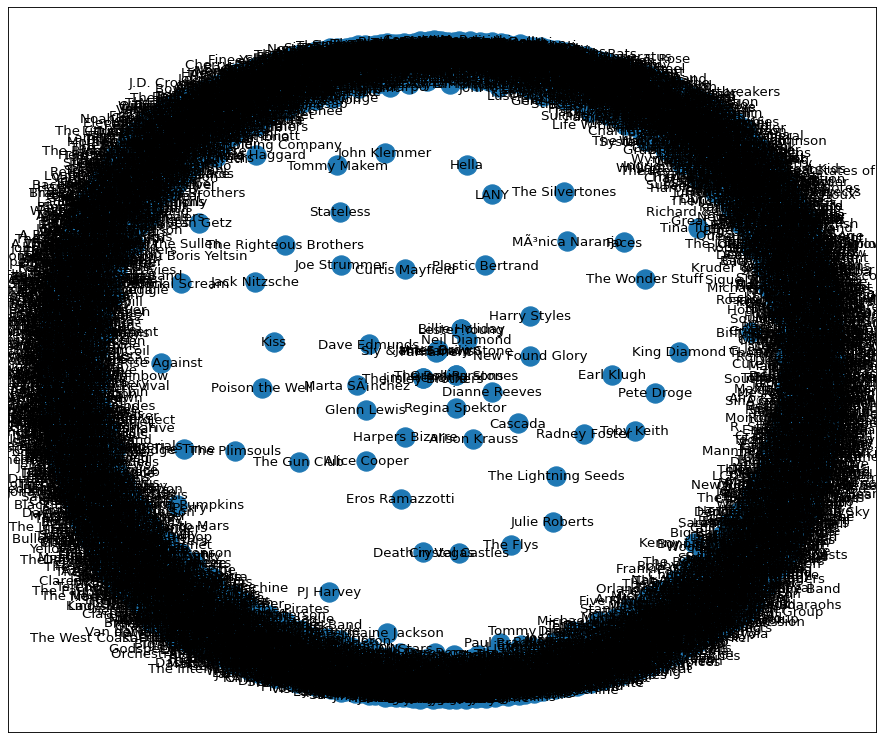

In [47]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(14, 12), dpi=80, facecolor='w', edgecolor='k')
nx.draw_networkx(G)

plt.savefig("GraphBFS1.png")

In [48]:
theDict = nx.algorithms.centrality.betweenness_centrality(G)
df = pd.DataFrame.from_dict(data, orient = 'index')
#, columns = ['Betweenness']
#df = df.sort_values(by = ['Betweenness'], ascending = False)
print(df.head(10))


                                  0                             1    ...   613   614
AC/DC                     Soundgarden               Alice in Chains  ...  None  None
Aerosmith                 Soundgarden                       Pantera  ...  None  None
Al Green         Terence Trent D'Arby             Teddy Pendergrass  ...  None  None
Alice Cooper              Soundgarden               Alice in Chains  ...  None  None
Alice in Chains               Taproot                     Shinedown  ...  None  None
Aretha Franklin           Alicia Keys  Sharon Jones & the Dap-Kings  ...  None  None
B.B. King             Ten Years After                     Son Seals  ...  None  None
Bee Gees                         Toto                       Tavares  ...  None  None
Big Star                    Semisonic                        Travis  ...  None  None
Bill Monroe       The Louvin Brothers           The Everly Brothers  ...  None  None

[10 rows x 615 columns]


In [49]:
G.edges(data = True)

OutEdgeDataView([('Billie Holiday', 'Lester Young', {'weight': 8.595449689382004}), ('Gram Parsons', 'The Rolling Stones', {'weight': 9.697078200213083}), ('James Brown', 'Miles Davis', {'weight': 10.112167001239515}), ('Jimi Hendrix', 'The Isley Brothers', {'weight': 9.132054453577638}), ('Lester Young', 'Billie Holiday', {'weight': 8.595449689382004}), ('Miles Davis', 'Sly & the Family Stone', {'weight': 9.27995971385624}), ('Miles Davis', 'James Brown', {'weight': 10.112167001239515}), ('Parliament', 'Sly & the Family Stone', {'weight': 8.076204527239026}), ('Sly & the Family Stone', 'Parliament', {'weight': 8.076204527239026}), ('Sly & the Family Stone', 'Miles Davis', {'weight': 9.27995971385624}), ('The Isley Brothers', 'Jimi Hendrix', {'weight': 9.132054453577638}), ('The Rolling Stones', 'Gram Parsons', {'weight': 9.697078200213083})])